# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

# Load Dataset


In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#Drop Duplicates

In [3]:
df = df.drop_duplicates(subset=["track_name", "artists"], keep="first")

# Drop Specific Columns

In [4]:
meta_cols = [
    "Unnamed: 0",
    "track_id",
    "artists",
    "album_name",
    "track_name"
]

df_meta = df[meta_cols].copy()
df_features = df.drop(columns=meta_cols)

In [5]:
df_features.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df_meta.head()

,Unnamed: 0,track_id,artists,album_name,track_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On


# One Hot Encoding

In [7]:
df_features = pd.get_dummies(
    df_features,
    columns=["track_genre"],
    prefix="genre"
)

In [8]:
print(df_features.shape)
print(df_features.columns)
print(df_features.head())

(81344, 128)
Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       ...
       'genre_spanish', 'genre_study', 'genre_swedish', 'genre_synth-pop',
       'genre_tango', 'genre_techno', 'genre_trance', 'genre_trip-hop',
       'genre_turkish', 'genre_world-music'],
      dtype='object', length=128)
   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  ...  genre_spanish  genre_study  \
0     0       0.1430        0.0322  ...          False        False   
1    

# Normalization

In [9]:
num_cols = df_features.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if not c.startswith("genre_")]

genre_cols = [c for c in df_features.columns if c.startswith("genre_")]

num_cols
genre_cols[:5]

['genre_acoustic',
 'genre_afrobeat',
 'genre_alt-rock',
 'genre_alternative',
 'genre_ambient']

In [10]:
scaler = StandardScaler()

df_features_scaled = df_features.copy()
df_features_scaled[num_cols] = scaler.fit_transform(df_features[num_cols])

df_features_scaled[num_cols].describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04,8.134400e+04
mean,1.537366e-16,5.590423e-17,2.515690e-17,-4.472338e-16,-3.808476e-17,3.773535e-17,1.397606e-17,-1.774959e-16,-2.320025e-16,-5.590423e-18,-2.166289e-16,9.363958e-17,-2.250145e-16,1.397606e-18
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.781809e+00,-1.986473e+00,-3.146511e+00,-2.455267e+00,-1.485815e+00,-7.717083e+00,-1.311449e+00,-7.630481e-01,-9.697352e-01,-5.571080e-01,-1.108192e+00,-1.758970e+00,-4.054110e+00,-8.538630e+00
25%,-7.014870e-01,-4.939377e-01,-6.372909e-01,-6.960494e-01,-9.236369e-01,-3.501232e-01,-1.311449e+00,-4.535155e-01,-9.229648e-01,-5.571080e-01,-6.113948e-01,-8.439478e-01,-7.546637e-01,2.257520e-01
50%,1.872733e-02,-1.391289e-01,7.721789e-02,1.661606e-01,-8.036944e-02,2.510853e-01,7.625154e-01,-3.420495e-01,-4.108441e-01,-5.568405e-01,-4.373896e-01,-5.421899e-02,-3.818089e-03,2.257520e-01
75%,7.389417e-01,3.084659e-01,7.354662e-01,8.582484e-01,7.628980e-01,6.511055e-01,7.625154e-01,-1.708309e-02,8.804883e-01,-9.569346e-02,3.191546e-01,8.076485e-01,5.968800e-01,2.257520e-01
max,3.362580e+00,4.297126e+01,2.395152e+00,1.411145e+00,1.606166e+00,2.474383e+00,7.625154e-01,7.511161e+00,1.960030e+00,2.458674e+00,3.935436e+00,2.018819e+00,4.023638e+00,2.416847e+00


In [11]:
df_features_scaled[genre_cols] = df_features_scaled[genre_cols].astype(int)
df_features_scaled.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_spanish,genre_study,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_world-music
0,1.973595,-0.006401,False,0.656701,-0.672851,-1.204726,0.348357,-1.311449,0.463078,-0.875018,...,0,0,0,0,0,0,0,0,0,0
1,1.047605,-0.702198,False,-0.783568,-1.813442,-1.204726,-1.628934,0.762515,-0.108828,1.748240,...,0,0,0,0,0,0,0,0,0,0
2,1.150493,-0.176710,False,-0.682299,-1.067225,-1.485815,-0.214914,0.762515,-0.285459,-0.352014,...,0,0,0,0,0,0,0,0,0,0
3,1.870707,-0.253049,False,-1.649981,-2.224829,-1.485815,-1.870228,0.762515,-0.451801,1.692351,...,0,0,0,0,0,0,0,0,0,0
4,2.436590,-0.279488,False,0.330390,-0.742446,-0.923637,-0.204923,0.762515,-0.312039,0.409843,...,0,0,0,0,0,0,0,0,0,0


# K-Means

In [12]:
# Convert Dataframe to Numpy array
X = df_features_scaled.values
print(X)

[[1.9735948426040064 -0.006400791472103258 False ... 0 0 0]
 [1.0476049699408194 -0.7021977497111639 False ... 0 0 0]
 [1.1504927335700623 -0.17671035093053894 False ... 0 0 0]
 ...
 [-0.6500431299416902 0.3438325767690346 False ... 0 0 1]
 [0.3273906245361184 0.4505078235124812 False ... 0 0 1]
 [-0.6500431299416902 0.0893983357232668 False ... 0 0 1]]


In [13]:
k_values = [2, 3, 5, 7, 10, 15, 20]
sse = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

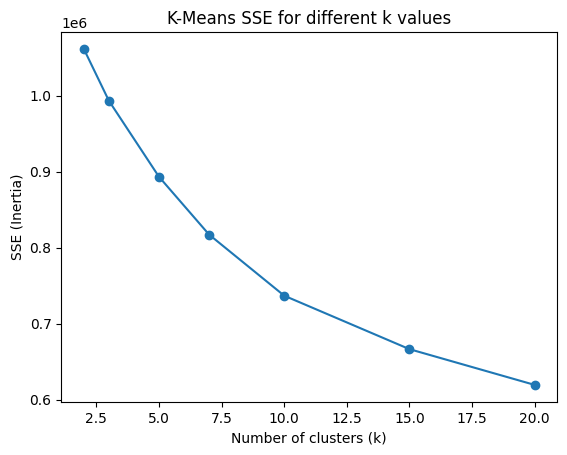

In [14]:
plt.figure()
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("K-Means SSE for different k values")
plt.show()

# Elbow Method

In [15]:
k_optimal = 10

In [16]:
kmeans = KMeans(
    n_clusters=k_optimal,
    init="k-means++",
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(df_features_scaled.values)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [17]:
labels = kmeans.labels_
labels.shape

(81344,)

# Dominant Genre for Each Cluster

In [18]:
df_clusters_genres = df_features_scaled.copy()
df_clusters_genres["cluster"] = labels

In [19]:
results = []

for cluster_id in sorted(df_clusters_genres["cluster"].unique()):
    cluster_data = df_clusters_genres[df_clusters_genres["cluster"] == cluster_id]

    genre_counts = cluster_data[genre_cols].sum()
    dominant_genre = genre_counts.idxmax()
    dominant_count = genre_counts.max()

    total_tracks = len(cluster_data)
    dominant_percentage = dominant_count / total_tracks * 100

    results.append({
        "cluster": cluster_id,
        "dominant_genre": dominant_genre.replace("genre_", ""),
        "percentage": dominant_percentage
    })

df_dominant = pd.DataFrame(results)

In [20]:
df_dominant

,cluster,dominant_genre,percentage
0,0,pop-film,3.175365
1,1,kids,4.592247
2,2,turkish,2.824289
3,3,sleep,20.713464
4,4,new-age,12.671113
5,5,pagode,8.518877
6,6,detroit-techno,9.063223
7,7,comedy,81.256332
8,8,grindcore,5.860220
9,9,tango,5.565693


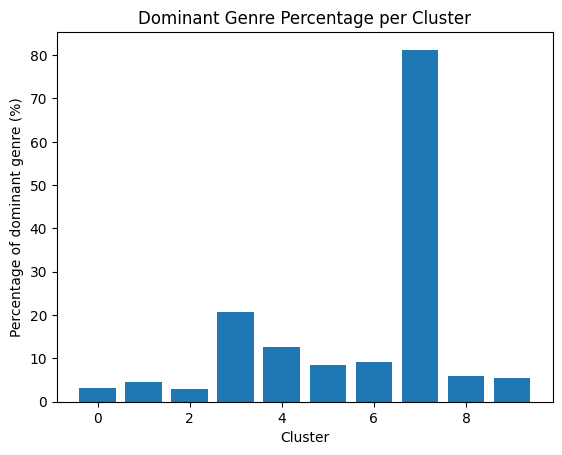

In [21]:
plt.figure()
plt.bar(df_dominant["cluster"], df_dominant["percentage"])
plt.xlabel("Cluster")
plt.ylabel("Percentage of dominant genre (%)")
plt.title("Dominant Genre Percentage per Cluster")
plt.show()

# Euclidean Distance Test

In [22]:
selected_track = df_meta[
    (df_meta["track_name"] == "Starboy")
].iloc[0]

print(selected_track)

Unnamed: 0                     81004
track_id      7MXVkk9YMctZqd1Srtv4MB
artists         The Weeknd;Daft Punk
album_name                   Starboy
track_name                   Starboy
Name: 81004, dtype: object


In [23]:
track_index = selected_track.name
print(track_index)

81004


In [24]:
track_title = selected_track["track_name"]
track_artist = selected_track["artists"]
track_cluster = labels[track_index]

print(f"Track: {track_title} by {track_artist}")
print(f"Cluster: {track_cluster}")

Track: Starboy by The Weeknd;Daft Punk
Cluster: 4


In [25]:
cluster_indices = np.where(labels == track_cluster)[0]
cluster_indices = cluster_indices[cluster_indices != track_index]

In [26]:
selected_vector = df_features_scaled.iloc[[track_index]]
cluster_vectors = df_features_scaled.iloc[cluster_indices]

distances = euclidean_distances(selected_vector, cluster_vectors)[0]

In [27]:
top_3_idx = np.argsort(distances)[:3]
top_3_track_indices = cluster_indices[top_3_idx]

top_3_recommendations = df_meta.loc[top_3_track_indices, ["track_name", "artists"]]
print(top_3_recommendations)

                   track_name        artists
81277           Christmas Eve  Justin Bieber
81267  We’re In This Together  Justin Bieber
81075     Kali Kali Zulfon Ke  Madhur Sharma


Θεωρώ πως ταιριάζουν τα κομματια καθώς τοσο ο weekend οσο και ο justing bieber ειναι pop καλλιτέχνες

# Cosine Distance Test

In [28]:
cos_sim = cosine_similarity(selected_vector, cluster_vectors)[0]
cos_distance = 1 - cos_sim

In [29]:
top_3_idx = np.argsort(cos_distance)[:3]
top_3_track_indices = cluster_indices[top_3_idx]
top_3_cosine = df_meta.loc[top_3_track_indices, ["track_name", "artists"]]
print(top_3_cosine)

                   track_name        artists
81277           Christmas Eve  Justin Bieber
81075     Kali Kali Zulfon Ke  Madhur Sharma
81267  We’re In This Together  Justin Bieber


Οι συστάσεις παρέμειναν οι ίδιες

# DB-Scan

In [34]:
X = df_features_scaled.values

dbscan = DBSCAN(
    eps=1.5,
    min_samples=10,
    metric="euclidean"
)

db_labels = dbscan.fit_predict(X)

In [35]:
unique_labels = set(db_labels)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(db_labels).count(-1)

print(n_clusters_dbscan)

227


Παρατηρούμε οτι ο αριθμός των cluster ειναι δραματικά μάεγαλύτερος 227 σε σχέση με τα 10 που είχαμε με το elbow method του K-means

Ο K-Means δίνει γενικευμένα, μεγάλα clusters, ενώ ο DBSCAN ανιχνεύει πραγματική πυκνότητα και ποικιλία των tracks, σχηματίζοντας περισσότερα clusters.